<a href="https://colab.research.google.com/github/Mercymerine/ML2_notes/blob/main/INTRODUCTION_TO_NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INTRODUCTION

Neural networks are computational models inspired by the human brain, consisting of interconnected nodes (neurons) that process information. They learn by adjusting weights and biases through techniques like backpropagation and gradient descent, enabling them to make predictions based on input data.

#### Analogy to the Human Brain
Neural networks mimic the way the human brain processes information. Just as neurons in the brain communicate through synapses, artificial neurons in a neural network are interconnected and transmit signals.
Each neuron receives inputs, processes them, and produces an output, similar to how a brain neuron fires based on the signals it receives.

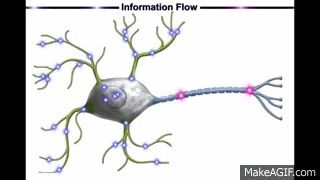



#### Key Components



**Neurons:** Basic units that receive inputs and produce outputs.

**Weights and Biases:**

Weights determine the strength of the connection between neurons. They are adjusted during training to minimize error.

Biases allow the model to fit the data better by shifting the activation function.

**Output Function:**
The output of a neuron is calculated using an activation function, which introduces non-linearity. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

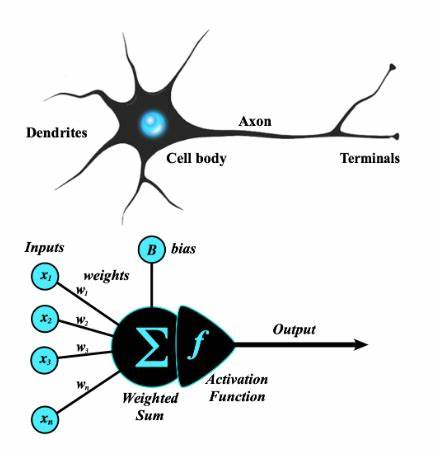

#### Training Process

**Forward Propagation:**

Input data is fed into the network, and each neuron processes the data through weighted sums and activation functions to produce an output.

**Loss Calculation:**

After generating an output, the network calculates the loss, which measures the difference between the predicted output and the actual output.

**Backpropagation:**

This is the process of updating weights and biases based on the loss. The gradients of the loss function are calculated, and weights are adjusted to minimize the loss using an optimization algorithm like gradient descent.

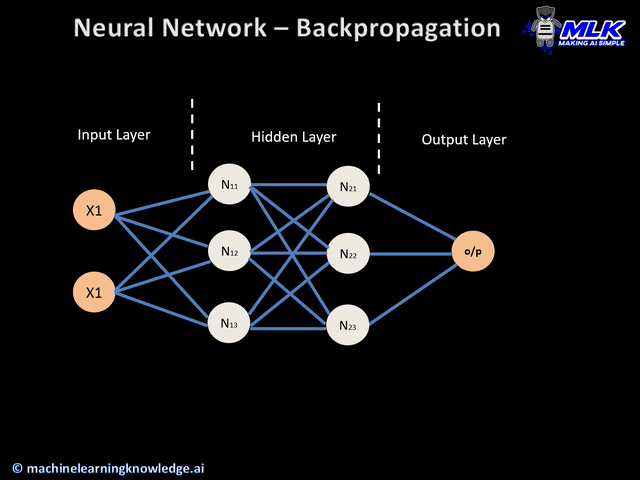


### Types of Neural Networks

1. Feedforward Neural Network (FNN): Simple structure where information moves in one direction.

2. Convolutional Neural Network (CNN): Excels in image recognition by capturing spatial features.

3. Recurrent Neural Network (RNN): Ideal for sequential data, like time series or text, by using feedback loops.

### Benefits and Disadvantages

#### Benefits:

1. Can model complex patterns and relationships.

2. Highly versatile and adaptable.

3. Capable of learning from data.

#### Disadvantages:

1. Requires a lot of data and computational power.

2. Can be a "black box" with limited interpretability.

3. Prone to overfitting if not properly regularized.


## Simple Implementation feed neural network.

##### Getting Packages

In [1]:
!pip  install tensorflow

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
df['species'] = iris.target

# Define feature variables (X) and target variable (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Label encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build the neural network model

In [5]:
# Create a Sequential model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(10, input_dim=4, activation='relu'))

# Add the second hidden layer
model.add(Dense(8, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sequential: Initializes a linear stack of layers.

Dense: Adds fully connected layers to the model.

input_dim=4: The input layer expects 4 features.

10 and 8: Number of neurons in the hidden layers.

activation: Specifies the activation function.

softmax: Used in the output layer for multi-class classification.

compile: Configures the model with the optimizer, loss function, and metrics.

sparse_categorical_crossentropy: Loss function for multi-class classification using label encoding.

In [6]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2817 - loss: 1.1732 - val_accuracy: 0.5000 - val_loss: 0.9750
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2436 - loss: 1.1588 - val_accuracy: 0.5000 - val_loss: 0.9727
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2507 - loss: 1.0837 - val_accuracy: 0.5000 - val_loss: 0.9760
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3339 - loss: 1.0595 - val_accuracy: 0.6667 - val_loss: 0.9858
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6177 - loss: 1.0215 - val_accuracy: 0.6667 - val_loss: 0.9827
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6518 - loss: 1.0057 - val_accuracy: 0.7083 - val_loss: 0.9723
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7391 - loss: 1.0012 - val_accuracy: 0.7083 - val_loss: 0.9555
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7395 - loss: 0.9842 - val_accuracy: 0.7917 - val_loss

In [7]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6178
Test Accuracy: 1.00
